##  <font color = "navy">WEATHER FORECAST IN AUSTRALIA: Analyse descriptive des données</font>
Notebook <b>1/3</b>
***

<font color = "purple"><b>Objectif: Étudier le contenu de la base de données, et comprendre à quoi correspondent les différentes variables et comment elles intéragissent entre elles.</b></font>

<b> Résumé du notebook : </b>
- Définition littérale fournie par les auteurs de la base de données et traduction en français ;
- Description statistique des variables, observation d'un éventuel effet de <i>RainToday</i> ;
- État des lieux des valeurs manquantes ;
- Visualisations graphiques.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import warnings
from scipy import stats
from IPython.display import Markdown, display
warnings.filterwarnings('ignore')
sns.set_theme({'legend.frameon':True})

In [2]:
df = pd.read_csv("weatherAUS.csv")

#Création d'un df de secours pour avoir une trace des données brutes.

df_saved = pd.read_csv("weatherAUS.csv")

pd.set_option("display.max_columns", None)

display(Markdown("<b>Affichage des premières lignes du dataframe."))
print(df.head())
print("\n------------------------------------------------------------------------")
display(Markdown("<b>Affichage des informations relatives au dataframe."))
print(df.info())
print("\n------------------------------------------------------------------------")
display(Markdown("<b>Description statistique du dataframe."))
print(df.describe().round(1))


<b>Affichage des premières lignes du dataframe.

         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0      

<b>Affichage des informations relatives au dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

<b>Description statistique du dataframe.

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  143975.0  144199.0  142199.0      82670.0   75625.0       135197.0   
mean       12.2      23.2       2.4          5.5       7.6           40.0   
std         6.4       7.1       8.5          4.2       3.8           13.6   
min        -8.5      -4.8       0.0          0.0       0.0            6.0   
25%         7.6      17.9       0.0          2.6       4.8           31.0   
50%        12.0      22.6       0.0          4.8       8.4           39.0   
75%        16.9      28.2       0.8          7.4      10.6           48.0   
max        33.9      48.1     371.0        145.0      14.5          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      143693.0      142398.0     142806.0     140953.0     130395.0   
mean           14.0          18.7         68.9         51.5       1017.6   
std             8.9           8.8         19.0         20.8          7.1   
mi

<h2><u><center>Date, Location</center></u></h2>

<h4><u>Définition des variables :</u></h4>

<ul><li><i>Date</i> est définie comme <i>'The date of observation'</i>, c'est-à-dire la date de chaque
relevé de mesure ;</li>
<li><i>Location</i> est définie comme <i>'The common name of the location of the weather station'</i>, 
c'est-à-dire le nom de chaque lieu de relevé de mesure.</li>
</ul>

<h4><u>Description des variables</u></h4>

<h5><i>Date :</i></h5>

Les dates des relevés sont au format <b>yyyy-mm-dd</b>, les relevés vont du <b>2007-11-01</b> au <b>2017-06-25</b>. 
On constate qu'il n'y que <b>61</b> relevés pour l'année <b>2007</b>, <b>2270</b> pour l'année <b>2008</b> et 
<b>8623</b> pour l'année <b>2017</b>. Pour les autres années, le nombre moyen de relevés est de <b>16813</b>.


<h5><i>Location :</i></h5>

Le nombre médian de relevés par lieu est de <b>3009</b>. Il y'a au total <b>49</b> lieux de relevé
différents. Les lieux avec le plus de relevés sont <b>Canberra</b> (3436 relevés) et <b>Sydney</b> (3344 relevés). 
Trois lieux fournissent moins de relevés que les autres : <b>Nhil</b>, <b>Katherine</b> et <b>Uluru</b> (1578 relevés chacun).


<h4><u>Valeurs manquantes :</u></h4>

Pas de valeurs manquantes pour ces deux variables.

<h4><u>Création de variables :</u></h4>

Création de la variable <b><i>State</i></b> qui représente la localisation des stations 
météorologiques par états.<ul><li>Les données de Canberra sont mutualisées avec la Nouvelle-Galle du Sud ;
</li><li>L'île de Norfolk est rattachée administrativement à l'état de Nouvelle-Galles du Sud, 
mais vu sa situation géographique (environ 1500km à l'est de l'Australie), les données seront traitées à part ;
</li><li>Si besoin, le classement par état est disponible dans le dictionnaire <i>localites</i>.</li></ul>
Création des variables <b><i>Year</i></b>, <b><i>Month</i></b> et <b><i>Day</i></b>, 
des entiers représentant respectivement l'année, le mois et le jour.


<h4><u>Visualisation graphique :</u></h4>

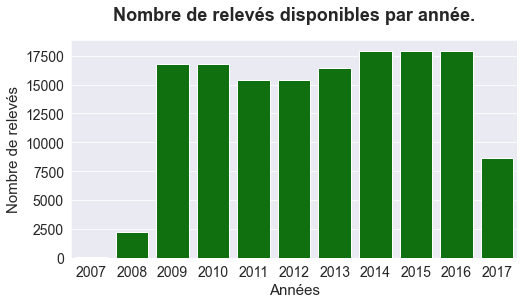

In [3]:
#DATE, LOCATION
display(Markdown("<h2><u><center>Date, Location</center></u></h2>"))
#Création de Year, Month & Day
df["Year"] = df["Date"].apply(lambda x : int(x[:4]))
df["Month"] = df["Date"].apply(lambda x : int(x[5:7]))
df["Day"] = df["Date"].apply(lambda x : int(x[8:]))

#Définition des variables
display(Markdown("<h4><u>Définition des variables :</u></h4>"))
display(Markdown("""<ul><li><i>Date</i> est définie comme <i>'The date of observation'</i>, c'est-à-dire la date de chaque
relevé de mesure ;</li>
<li><i>Location</i> est définie comme <i>'The common name of the location of the weather station'</i>, 
c'est-à-dire le nom de chaque lieu de relevé de mesure.</li>
</ul>"""))

display(Markdown("<h4><u>Description des variables</u></h4>"))
display(Markdown("<h5><i>Date :</i></h5>")) 
display(Markdown("""Les dates des relevés sont au format <b>yyyy-mm-dd</b>, les relevés vont du <b>{}</b> au <b>{}</b>. 
On constate qu'il n'y que <b>{}</b> relevés pour l'année <b>2007</b>, <b>{}</b> pour l'année <b>2008</b> et 
<b>{}</b> pour l'année <b>2017</b>. Pour les autres années, le nombre moyen de relevés est de <b>{}</b>.
""".format(df.Date.min(),
           df.Date.max(),
           df.Year[df["Year"] == 2007].count(),
           df.Year[df["Year"] == 2008].count(),
           df.Year[df["Year"] == 2017].count(),
           int(df.Year[(df["Year"] != 2007) & (df["Year"] != 2008) & (df["Year"] != 2017)].groupby(df.Year).count().mean()))))

display(Markdown("<h5><i>Location :</i></h5>"))
display(Markdown("""Le nombre médian de relevés par lieu est de <b>{}</b>. Il y'a au total <b>{}</b> lieux de relevé
différents. Les lieux avec le plus de relevés sont <b>{}</b> ({} relevés) et <b>{}</b> ({} relevés). 
Trois lieux fournissent moins de relevés que les autres : <b>{}</b>, <b>{}</b> et <b>{}</b> ({} relevés chacun).
""".format(int(df.Location.value_counts().median()),
           len(set(df.Location)), df.Location.value_counts().keys()[0],
           df.Location.value_counts()[0], df.Location.value_counts().keys()[1],
           df.Location.value_counts()[1], df.Location.value_counts().keys()[-1],
           df.Location.value_counts().keys()[-2], df.Location.value_counts().keys()[-3],
           df.Location.value_counts()[-1])))

#Valeurs manquantes
display(Markdown("<h4><u>Valeurs manquantes :</u></h4>"))
display(Markdown("Pas de valeurs manquantes pour ces deux variables."))

#Création de variables
display(Markdown("<h4><u>Création de variables :</u></h4>"))
display(Markdown("""Création de la variable <b><i>State</i></b> qui représente la localisation des stations 
météorologiques par états.<ul><li>Les données de Canberra sont mutualisées avec la Nouvelle-Galle du Sud ;
</li><li>L'île de Norfolk est rattachée administrativement à l'état de Nouvelle-Galles du Sud, 
mais vu sa situation géographique (environ 1500km à l'est de l'Australie), les données seront traitées à part ;
</li><li>Si besoin, le classement par état est disponible dans le dictionnaire <i>localites</i>.</li></ul>
Création des variables <b><i>Year</i></b>, <b><i>Month</i></b> et <b><i>Day</i></b>, 
des entiers représentant respectivement l'année, le mois et le jour.
"""))

#Création du dictionnaire qui contient pour chaque état australier, les stations associées
localites = {"SA" : ["Adelaide", "MountGambier", "Woomera", "Nuriootpa"],
            "WA" : ["Perth", "Albany", "PearceRAAF", "PerthAirport", "Walpole", "SalmonGums", "Witchcliffe"],
            "NSW" : ["Canberra", "Sydney", "Albury", "Wollongong", "MountGinini", "Tuggeranong", "Penrith", "Newcastle", "Cobar", "SydneyAirport", "BadgerysCreek", "WaggaWagga", "Moree", "Williamtown", "CoffsHarbour", "NorahHead", "Richmond"],
            "QLD" : ["Brisbane", "Townsville", "Cairns", "GoldCoast"],
            "TAS" : ["Hobart", "Launceston"],
            "VIC" : ["Melbourne", "Bendigo", "Ballarat", "Dartmoor", "Portland", "Mildura", "MelbourneAirport", "Sale", "Watsonia", "Nhil"],
            "NT" : ["Darwin", "AliceSprings", "Katherine", "Uluru"],
            "NI" : ["NorfolkIsland"]}

#Création de la colonne State
df["State"] = df.Location
df["State"] = df["State"].replace(to_replace = ["Adelaide", "MountGambier", "Woomera", "Nuriootpa"], value = "SA")
df["State"] = df["State"].replace(to_replace = ["Perth", "Albany", "PearceRAAF", "PerthAirport", "Walpole", "SalmonGums", "Witchcliffe"], value = "WA")
df["State"] = df["State"].replace(to_replace = ["Canberra", "Sydney", "Albury", "Wollongong", "MountGinini", "Tuggeranong", "Penrith", "Newcastle", "Cobar", "SydneyAirport", "BadgerysCreek", "WaggaWagga", "Moree", "Williamtown", "CoffsHarbour", "NorahHead", "Richmond"], value = "NSW")
df["State"] = df["State"].replace(to_replace = ["Brisbane", "Townsville", "Cairns", "GoldCoast"], value = "QLD")
df["State"] = df["State"].replace(to_replace = ["Hobart", "Launceston"], value = "TAS")
df["State"] = df["State"].replace(to_replace = ["Melbourne", "Bendigo", "Ballarat", "Dartmoor", "Portland", "Mildura", "MelbourneAirport", "Sale", "Watsonia", "Nhil"], value = "VIC")
df["State"] = df["State"].replace(to_replace = ["Darwin", "AliceSprings", "Katherine", "Uluru"], value = "NT")
df["State"] = df["State"].replace(to_replace = ["NorfolkIsland"], value = "NI")

#Visualisation
display(Markdown("<h4><u>Visualisation graphique :</u></h4>"))

plt.figure(figsize = (8,4))
sns.countplot("Year", data = df, color = "green")
plt.title("Nombre de relevés disponibles par année.", fontsize = 18, fontweight = "bold", pad = 20)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.xlabel('Années', fontsize=15)
plt.ylabel('Nombre de relevés', fontsize=15)
plt.show();


<h2><u><center>Températures</center></u></h2>

<h4><u>Définition des variables :</u></h4>

<ul><li><i>MinTemp</i> est définie comme <i>'The minimum temperature in degrees celsius'</i>, 
soit la température minimale relevée sur la journée ;</li>
<li><i>MaxTemp</i> est définie comme <i>'The maximum temperature in degrees celsius'</i>, 
soit la température maximale relevée sur la journée ;</li>
<li><i>Temp9am</i> est définie comme <i>'Temperature (degrees C) at 9am'</i>, soit la température relevée à 9h ;</li>
<li><i>Temp3pm</i> est définie comme <i>'Temperature (degrees C) at 3pm'</i>, soit la température relevée à 15h.</li></ul>

<h4><u>Description des variables :</u></h4>

<h5><i>MinTemp et MaxTemp :</i></h5>

Ces deux variables varient de façon similaire au fil des mois : les températures les plus hautes 
sont retrouvées en janvier et les plus basses en juillet. Au mois de juillet, les températures minimales et maximales 
moyennes sont de <b>6.9 ± 5.2 °C</b> et <b>16.7 ± 5.2 °C</b> respectivement, tandis qu'au mois de janvier 
elles sont de <b>17.5 ± 4.8 °C</b> et <b>29.5 ± 6.0 °C</b> respectivement.


<h5><i>Temp9am :</i></h5>

La température moyenne à 9h est <b>plus basse les jours de pluie</b> (15.8 ± 6.1 °C) 
que les jours sans pluie (17.3 ± 6.6 °C). La variabilité est assez similaire qu'il pleuve ou non et il y'a de
nombreux outliers, principalement dans les valeurs hautes. 
D'une localité à l'autre, la température matinale semble peu varier, mais plusieurs villes du nord se distinguent par 
leur températures plus élevées: Brisbane, Cairns, Gold Coast, Townsville, Alice Springs, Darwin, Katherine et Uluru.
Les températures matinales sont minimales au mois de <b>juillet</b>, qu'il pleuve ou non, et avec une variabilité 
par mois limitée et stable d'une année sur l'autre. Les minimales moyennes en juillet sont de <b>10.6 ± 4.0 °C</b> 
les jours de pluie, <b>10.9 ± 5.4 °C</b> sinon.
Les températures matinales maximales sont observées au mois de <b>janvier</b> et sont de 22.1 ± 4.8 °C les jours de pluie, 
22.6 ± 5.1 °C sinon. Par ailleurs, les températures matinales sont corrélées à celles de l'après-midi 
(<i>Spearman</i> : <b>0.88</b>).


<h5><i>Temp3pm :</i></h5>

Les observations à 15h suivent les <b>mêmes tendances</b> qu'à 9h. 
La température moyenne à 15h est plus basse les jours de pluie <b>(18.6 ± 6.3 °C)</b> que les 
jours sans pluie <b>(22.6 ± 6.9 °C)</b>. Les températures l'après-midi sont maximales en <b>juillet</b>, 
<b>13.6 ± 4.1 °C</b> les jours de pluie, <b>16.4 ± 5.2 °C</b> sinon. Au mois de <b>janvier</b>, 
elles sont de <b>25.0 ± 5.1 °C</b> les jours de pluie, <b>28.3 ± 6.0 °C</b> sinon.


<h4><u>Valeurs manquantes :</u></h4>

<ul><li><i>MinTemp</i> : <b>1485</b> valeurs manquantes (1.0 %) ;</li> 
<li><i>MaxTemp</i> : <b>1261</b> valeurs manquantes (0.9 %) ;</li>
<li><i>Temp9am</i> : <b>1767</b> valeurs manquantes (1.2 %) ;</li> 
<li><i>Temp3pm</i> : <b>3609</b> valeurs manquantes (2.5 %).</li></ul>


<h4><u>Visualisation graphique :</u></h4>

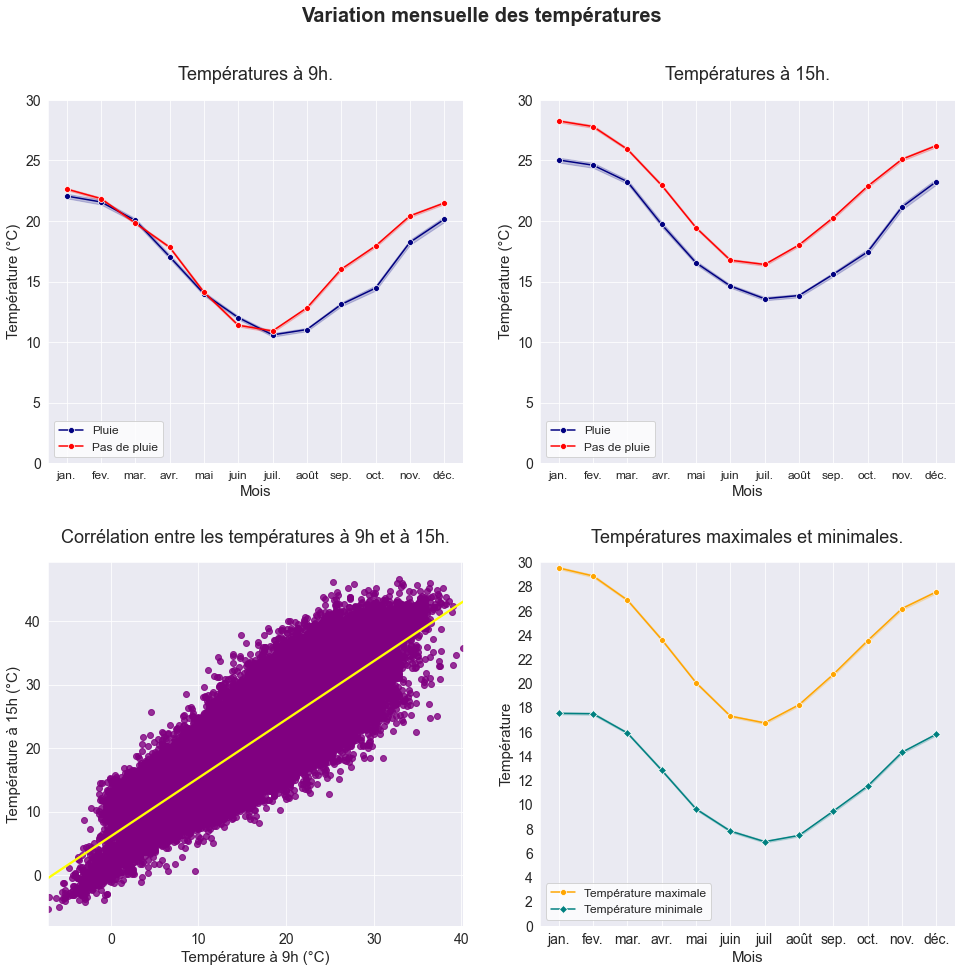

In [4]:
##MINTEMP, MAXTEMP, TEMP9AM, TEMP3PM

display(Markdown("<h2><u><center>Températures</center></u></h2>"))

#Définition des variables
display(Markdown("<h4><u>Définition des variables :</u></h4>"))
display(Markdown("""<ul><li><i>MinTemp</i> est définie comme <i>'The minimum temperature in degrees celsius'</i>, 
soit la température minimale relevée sur la journée ;</li>
<li><i>MaxTemp</i> est définie comme <i>'The maximum temperature in degrees celsius'</i>, 
soit la température maximale relevée sur la journée ;</li>
<li><i>Temp9am</i> est définie comme <i>'Temperature (degrees C) at 9am'</i>, soit la température relevée à 9h ;</li>
<li><i>Temp3pm</i> est définie comme <i>'Temperature (degrees C) at 3pm'</i>, soit la température relevée à 15h.</li></ul>"""))

#Description des variables
display(Markdown("<h4><u>Description des variables :</u></h4>"))
display(Markdown("<h5><i>MinTemp et MaxTemp :</i></h5>"))
display(Markdown("""Ces deux variables varient de façon similaire au fil des mois : les températures les plus hautes 
sont retrouvées en janvier et les plus basses en juillet. Au mois de juillet, les températures minimales et maximales 
moyennes sont de <b>{} ± {} °C</b> et <b>{} ± {} °C</b> respectivement, tandis qu'au mois de janvier 
elles sont de <b>{} ± {} °C</b> et <b>{} ± {} °C</b> respectivement.
""".format(df[df["Month"] == 7].MinTemp.describe()["mean"].round(1),
           df[df["Month"] == 7].MinTemp.describe()["std"].round(1),
           df[df["Month"] == 7].MaxTemp.describe()["mean"].round(1),
           df[df["Month"] == 7].MaxTemp.describe()["std"].round(1),
           df[df["Month"] == 1].MinTemp.describe()["mean"].round(1),
           df[df["Month"] == 1].MinTemp.describe()["std"].round(1),
           df[df["Month"] == 1].MaxTemp.describe()["mean"].round(1),
           df[df["Month"] == 1].MaxTemp.describe()["std"].round(1))))

display(Markdown("<h5><i>Temp9am :</i></h5>"))
display(Markdown("""La température moyenne à 9h est <b>plus basse les jours de pluie</b> ({} ± {} °C) 
que les jours sans pluie ({} ± {} °C). La variabilité est assez similaire qu'il pleuve ou non et il y'a de
nombreux outliers, principalement dans les valeurs hautes. 
D'une localité à l'autre, la température matinale semble peu varier, mais plusieurs villes du nord se distinguent par 
leur températures plus élevées: Brisbane, Cairns, Gold Coast, Townsville, Alice Springs, Darwin, Katherine et Uluru.
Les températures matinales sont minimales au mois de <b>juillet</b>, qu'il pleuve ou non, et avec une variabilité 
par mois limitée et stable d'une année sur l'autre. Les minimales moyennes en juillet sont de <b>{} ± {} °C</b> 
les jours de pluie, <b>{} ± {} °C</b> sinon.
Les températures matinales maximales sont observées au mois de <b>janvier</b> et sont de {} ± {} °C les jours de pluie, 
{} ± {} °C sinon. Par ailleurs, les températures matinales sont corrélées à celles de l'après-midi 
(<i>Spearman</i> : <b>{}</b>).
""".format(df[df["RainToday"] == "Yes"].Temp9am.describe()["mean"].round(1),
           df[df["RainToday"] == "Yes"].Temp9am.describe()["std"].round(1),
           df[df["RainToday"] == "No"].Temp9am.describe()["mean"].round(1),
           df[df["RainToday"] == "No"].Temp9am.describe()["std"].round(1),
           df[(df["RainToday"] == "Yes") & (df["Month"] == 7)].Temp9am.describe()["mean"].round(1),
           df[(df["RainToday"] == "Yes") & (df["Month"] == 7)].Temp9am.describe()["std"].round(1),
           df[(df["RainToday"] == "No") & (df["Month"] == 7)].Temp9am.describe()["mean"].round(1),
           df[(df["RainToday"] == "No") & (df["Month"] == 7)].Temp9am.describe()["std"].round(1), 
           df[(df["RainToday"] == "Yes") & (df["Month"] == 1)].Temp9am.describe()["mean"].round(1),
           df[(df["RainToday"] == "Yes") & (df["Month"] == 1)].Temp9am.describe()["std"].round(1),
           df[(df["RainToday"] == "No") & (df["Month"] == 1)].Temp9am.describe()["mean"].round(1),
           df[(df["RainToday"] == "No") & (df["Month"] == 1)].Temp9am.describe()["std"].round(1), 
           round(stats.spearmanr(df.dropna()["Temp9am"], df.dropna()["Temp3pm"])[0],2))))

display(Markdown("<h5><i>Temp3pm :</i></h5>"))
display(Markdown("""Les observations à 15h suivent les <b>mêmes tendances</b> qu'à 9h. 
La température moyenne à 15h est plus basse les jours de pluie <b>({} ± {} °C)</b> que les 
jours sans pluie <b>({} ± {} °C)</b>. Les températures l'après-midi sont maximales en <b>juillet</b>, 
<b>{} ± {} °C</b> les jours de pluie, <b>{} ± {} °C</b> sinon. Au mois de <b>janvier</b>, 
elles sont de <b>{} ± {} °C</b> les jours de pluie, <b>{} ± {} °C</b> sinon.
""".format(df[df["RainToday"] == "Yes"].Temp3pm.describe()["mean"].round(1),
           df[df["RainToday"] == "Yes"].Temp3pm.describe()["std"].round(1),
           df[df["RainToday"] == "No"].Temp3pm.describe()["mean"].round(1),
           df[df["RainToday"] == "No"].Temp3pm.describe()["std"].round(1),
           df[(df["RainToday"] == "Yes") & (df["Month"] == 7)].Temp3pm.describe()["mean"].round(1),
           df[(df["RainToday"] == "Yes") & (df["Month"] == 7)].Temp3pm.describe()["std"].round(1),
           df[(df["RainToday"] == "No") & (df["Month"] == 7)].Temp3pm.describe()["mean"].round(1),
           df[(df["RainToday"] == "No") & (df["Month"] == 7)].Temp3pm.describe()["std"].round(1),
           df[(df["RainToday"] == "Yes") & (df["Month"] == 1)].Temp3pm.describe()["mean"].round(1),
           df[(df["RainToday"] == "Yes") & (df["Month"] == 1)].Temp3pm.describe()["std"].round(1),
           df[(df["RainToday"] == "No") & (df["Month"] == 1)].Temp3pm.describe()["mean"].round(1),
           df[(df["RainToday"] == "No") & (df["Month"] == 1)].Temp3pm.describe()["std"].round(1))))

#Valeurs manquantes
display(Markdown("<h4><u>Valeurs manquantes :</u></h4>"))
display(Markdown("""<ul><li><i>MinTemp</i> : <b>{}</b> valeurs manquantes ({} %) ;</li> 
<li><i>MaxTemp</i> : <b>{}</b> valeurs manquantes ({} %) ;</li>
<li><i>Temp9am</i> : <b>{}</b> valeurs manquantes ({} %) ;</li> 
<li><i>Temp3pm</i> : <b>{}</b> valeurs manquantes ({} %).</li></ul>
""".format(df_saved.MinTemp.isna().sum(),
           ((100*df_saved.MinTemp.isna().sum())/df_saved.shape[0]).round(1),
           df_saved.MaxTemp.isna().sum(),
           ((100*df_saved.MaxTemp.isna().sum())/df_saved.shape[0]).round(1),
           df_saved.Temp9am.isna().sum(),
           ((100*df_saved.Temp9am.isna().sum())/df_saved.shape[0]).round(1),
           df_saved.Temp3pm.isna().sum(),
           ((100*df_saved.Temp3pm.isna().sum())/df_saved.shape[0]).round(1))))

#Visualisation graphique
display(Markdown("<h4><u>Visualisation graphique :</u></h4>"))

plt.figure(figsize = (14, 14))
plt.suptitle("Variation mensuelle des températures", fontsize = 20, fontweight='bold')

plt.subplot(221)
plt.title("Températures à 9h.", fontsize = 18, pad = 20)
sns.lineplot(x = "Month", y = "Temp9am", data = df[df["RainToday"] == "Yes"], label = "Pluie", color = "navy", marker = "o")
sns.lineplot(x = "Month", y = "Temp9am", data = df[df["RainToday"] == "No"], label = "Pas de pluie", color = "red", marker = "o")
plt.xlabel("Mois", fontsize = 15)
plt.ylabel("Température (°C)", size = 15)
plt.legend(fontsize = 12, loc= 3, facecolor = 'white')
plt.grid(axis = "y")
plt.ylim([0,30])
plt.yticks(range(0,31,5), size = 14)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ["jan.", "fev.", "mar.", "avr.", "mai", "juin", "juil.", "août", "sep.", "oct.", "nov.", "déc."], size = 12)
plt.grid(visible = True, axis = "y")

plt.subplot(222)
plt.title("Températures à 15h.", fontsize = 18, pad = 20)
sns.lineplot(x = "Month", y = "Temp3pm", data = df[df["RainToday"] == "Yes"], label = "Pluie", color = "navy", marker = "o")
sns.lineplot(x = "Month", y = "Temp3pm", data = df[df["RainToday"] == "No"], label = "Pas de pluie", color = "red", marker = "o")
plt.xlabel("Mois", fontsize = 15)
plt.ylabel("Température (°C)", size = 15)
plt.legend(fontsize = 12, loc = 3, facecolor = 'white')
plt.grid(axis = "y")
plt.ylim([0,30])
plt.yticks(range(0,31,5), size = 14)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ["jan.", "fev.", "mar.", "avr.", "mai", "juin", "juil.", "août", "sep.", "oct.", "nov.", "déc."], size = 12)
plt.grid(visible = True, axis = "y")

plt.subplot(223)
plt.title("Corrélation entre les températures à 9h et à 15h.", fontsize = 18, pad = 20)
sns.regplot(x = "Temp9am", y = "Temp3pm", data = df, color = "purple", line_kws = {"color" : "yellow"})
plt.xlabel("Température à 9h (°C)", fontsize = 15)
plt.ylabel("Température à 15h (°C)", fontsize = 15)
plt.xticks(size = 14)
plt.yticks(size = 14)

plt.subplot(224)
plt.title("Températures maximales et minimales.", fontsize = 18, pad = 20)
sns.lineplot(x = "Month", y = "MaxTemp", data = df, label = "Température maximale", color = "orange", marker = "o")
sns.lineplot(x = "Month", y = "MinTemp", data = df, label = "Température minimale", color = "teal", marker = "D")
plt.ylabel("Température", fontsize = 15)
plt.xlabel("Mois", fontsize = 15)
plt.legend(fontsize = 12, facecolor = 'white')
plt.grid(axis = "y")
plt.ylim([0,30])
plt.yticks(range(0,31,2), size = 14)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ["jan.", "fev.", "mar.", "avr.", "mai", "juin", "juil", "août", "sep.", "oct.", "nov.", "déc."], size = 14)

plt.tight_layout(pad=3)
plt.show();

<h2><u><center>Rainfall, Evaporation, Humidity9am, Humidity3pm</center></u></h2>

<h4><u>Définition des variables :</u></h4>

<ul><li><i>Rainfall</i> est définie comme <i>'The amount of rainfall recorded for the day in mm'</i>, 
soit la hauteur des précipitations en mm ;</li>
<li><i>Evaporation</i> est définie comme <i>'The so-called Class A pan evaporation (mm) in the 24 hours to 9am'</i>, 
soit hauteur évaporée sur la journée, relevée à 9h ;</li>
<li><i>Humidity9am</i> est définie comme <i>'Humidity (percent) at 9am'</i>, soit le pourcentage d'humidité relevé à 9h ;</li>
<li><i>Humidity3pm</i> est définie comme <i>'Humidity (percent) at 3pm'</i>, soit le pourcentage d'humidité relevé à 15h.</li></ul>

<h4><u>Description des variables :</u></h4>

<h5><i>Rainfall :</i></h5>

Il y'a <b>31880</b> relevés qui concernent des jours de pluie (soit <b>21.92 %</b> des relevés),
avec une grande variabilité de la hauteur de précipitations. En effet, les jours de pluie la hauteur
moyenne des précipitations est de <b>10.3 ± 15.5 cm</b>, avec une valeur maximale de <b>371.0 cm</b>. 
Attention, les moyennes sont biaisées par des valeurs hautes, la hauteur médiane des précipitations
étant de <b>5.2 cm</b>, IQR : (<b>2.4 - 11.8</b>). Enfin, cette variable est directement liée à 
<i>RainToday</i> : <i>RainToday</i> = '<i>no</i>' quand <i>Rainfall</i> ≤ 1.0 et 
<i>RainToday</i> = '<i>yes</i>' quand <i>Rainfall</i> > 1.0 cm.


<h5><i>Evaporation :</i></h5>

<i>Evaporation</i> présente beaucoup d'outliers et est modérément correlée à <i>RainToday</i> (<i>Spearman</i> : <b>-0.25</b>). 
Le phénomène d'évaporation est plus imporant les jours sans pluie, aussi cette variable semble se comporter 
inversement à <i>Rainfall</i> en fonction de <i>RainToday</i>. La hauteur d'évaporation médiane est de <b>3.2 cm</b>, 
IQR (<b>1.8 - 5.4</b>) les jours de pluie et de <b>5.2 cm</b>, IQR (<b>3.0 - 7.8</b>) les jours sans pluie.


<h5><i>Humidity9am :</i></h5>

Le pourcentage d'humidité à 9h moyen est de <b>81.4 ± 13.8 %</b> les jours de pluie et de <b>65.2 ± 18.8 %</b> 
les jours sans pluie. L'humidité à 9h est corrélée à l'humidité à 15h (<i>Spearman</i> : <b>0.66</b>); et
une corrélation modérée avec la hauteur des précipitations existe également (<i>Spearman</i> : <b>0.47</b>), 
mais limitée par la forte variabilité existant pour le taux d'humidité. Le taux d'humidité à 9h varie relativement 
peu d'une localité à l'autre, à l'exception de certaines zones situées dans les terres (Alice Springs, Woomera, Cobar, Uluru...)
qui présentent des taux plus bas. On remarque dans l'ensemble de nombreux outliers pour les valeurs d'humidité plus basses, 
et il apprait que l'humidité à 9h varie au fil des mois, de façon assez similaire qu'il pleuve ou non, et avec une variabilité 
par mois limitée et stable d'une année sur l'autre.


<h5><i>Humidity3pm :</i></h5>

Le pourcentage d'humidité à 15h moyen est de <b>66.2 ± 17.5 %</b> les jours de pluie et de 
<b>47.3 ± 19.7 %</b> les jours sans pluie. Il existe une variabilité notoire pour le taux d'humidité à 15h d'une localité 
à l'autre. A la différence de l'humidité à 9h, il existe aussi des outliers pour les valeurs hautes ; les 
autres observations à 9h sont transposables à 15h. Enfin, le taux d'humidité à 15h est globalement plus faible que 
celui relevé à 9h.


<h4><u>Valeurs manquantes :</u></h4>

<ul><li><i>Rainfall</i> : <b>3261</b> valeurs manquantes (2.2 %) ;</li>
<li><i>Evaporation</i> : <b>62790</b> valeurs manquantes (43.2 %) ;</li>
<li><i>Humidity9am</i> : <b>2654</b> valeurs manquantes (1.8 %) ;</li>
<li><i>Hulidity3pm</i> : <b>4507</b> valeurs manquantes (3.1 %).</li></ul>


<h4><u>Visualisation graphique :</u></h4>

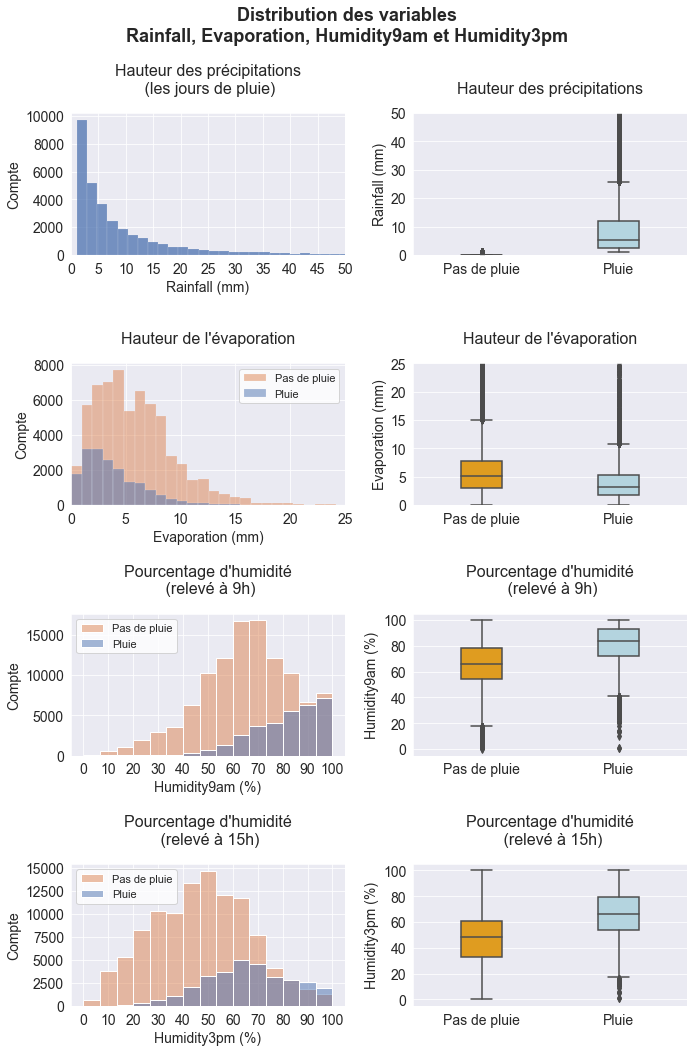

<i>Pour une meilleure visualisation, les données de Rainfall sont représentées jusqu'à 50 mm, les outliers vont jusque 371.0 mm. Les données pour Evaporation sont représentées jusqu'à 25 mm, les outliers vont jusque 145.0 mm.</i>

In [5]:
#RAINFALL, EVAPORATION, HUMIDITY9AM, HUMIDITY3PM
display(Markdown("<h2><u><center>Rainfall, Evaporation, Humidity9am, Humidity3pm</center></u></h2>"))

#Définition des variables
display(Markdown("<h4><u>Définition des variables :</u></h4>"))
display(Markdown("""<ul><li><i>Rainfall</i> est définie comme <i>'The amount of rainfall recorded for the day in mm'</i>, 
soit la hauteur des précipitations en mm ;</li>
<li><i>Evaporation</i> est définie comme <i>'The so-called Class A pan evaporation (mm) in the 24 hours to 9am'</i>, 
soit hauteur évaporée sur la journée, relevée à 9h ;</li>
<li><i>Humidity9am</i> est définie comme <i>'Humidity (percent) at 9am'</i>, soit le pourcentage d'humidité relevé à 9h ;</li>
<li><i>Humidity3pm</i> est définie comme <i>'Humidity (percent) at 3pm'</i>, soit le pourcentage d'humidité relevé à 15h.</li></ul>"""))

#Description des variables
display(Markdown("<h4><u>Description des variables :</u></h4>"))
display(Markdown("<h5><i>Rainfall :</i></h5>"))
display(Markdown("""Il y'a <b>{}</b> relevés qui concernent des jours de pluie (soit <b>{} %</b> des relevés),
avec une grande variabilité de la hauteur de précipitations. En effet, les jours de pluie la hauteur
moyenne des précipitations est de <b>{} ± {} cm</b>, avec une valeur maximale de <b>{} cm</b>. 
Attention, les moyennes sont biaisées par des valeurs hautes, la hauteur médiane des précipitations
étant de <b>{} cm</b>, IQR : (<b>{} - {}</b>). Enfin, cette variable est directement liée à 
<i>RainToday</i> : <i>RainToday</i> = '<i>no</i>' quand <i>Rainfall</i> ≤ 1.0 et 
<i>RainToday</i> = '<i>yes</i>' quand <i>Rainfall</i> > 1.0 cm.
""".format(df.Rainfall[df["Rainfall"] > 1].count(),
           (100*(df.Rainfall[df["Rainfall"] > 1].count())/len(df.Rainfall)).round(2),
           df.groupby("RainToday")["Rainfall"].describe()["mean"][1].round(1),
           df.groupby("RainToday")["Rainfall"].describe()["std"][1].round(1),
           df.groupby("RainToday")["Rainfall"].describe()["max"][1],
           df.groupby("RainToday")["Rainfall"].describe()["50%"][1],
           df.groupby("RainToday")["Rainfall"].describe()["25%"][1],
           df.groupby("RainToday")["Rainfall"].describe()["75%"][1])))    

display(Markdown("<h5><i>Evaporation :</i></h5>"))
display(Markdown(("""<i>Evaporation</i> présente beaucoup d'outliers et est modérément correlée à <i>RainToday</i> (<i>Spearman</i> : <b>{}</b>). 
Le phénomène d'évaporation est plus imporant les jours sans pluie, aussi cette variable semble se comporter 
inversement à <i>Rainfall</i> en fonction de <i>RainToday</i>. La hauteur d'évaporation médiane est de <b>{} cm</b>, 
IQR (<b>{} - {}</b>) les jours de pluie et de <b>{} cm</b>, IQR (<b>{} - {}</b>) les jours sans pluie.
""".format(round(stats.spearmanr(df.dropna()["Evaporation"], df.dropna()["RainToday"])[0], 2),
           df.groupby("RainToday")["Evaporation"].describe()["50%"][1],
           df.groupby("RainToday")["Evaporation"].describe()["25%"][1],
           df.groupby("RainToday")["Evaporation"].describe()["75%"][1],
           df.groupby("RainToday")["Evaporation"].describe()["50%"][0],
           df.groupby("RainToday")["Evaporation"].describe()["25%"][0],
           df.groupby("RainToday")["Evaporation"].describe()["75%"][0]))))

display(Markdown("<h5><i>Humidity9am :</i></h5>"))
display(Markdown("""Le pourcentage d'humidité à 9h moyen est de <b>{} ± {} %</b> les jours de pluie et de <b>{} ± {} %</b> 
les jours sans pluie. L'humidité à 9h est corrélée à l'humidité à 15h (<i>Spearman</i> : <b>{}</b>); et
une corrélation modérée avec la hauteur des précipitations existe également (<i>Spearman</i> : <b>{}</b>), 
mais limitée par la forte variabilité existant pour le taux d'humidité. Le taux d'humidité à 9h varie relativement 
peu d'une localité à l'autre, à l'exception de certaines zones situées dans les terres (Alice Springs, Woomera, Cobar, Uluru...)
qui présentent des taux plus bas. On remarque dans l'ensemble de nombreux outliers pour les valeurs d'humidité plus basses, 
et il apprait que l'humidité à 9h varie au fil des mois, de façon assez similaire qu'il pleuve ou non, et avec une variabilité 
par mois limitée et stable d'une année sur l'autre.
""".format(df[df["RainToday"] == "Yes"].Humidity9am.describe()["mean"].round(1),
           df[df["RainToday"] == "Yes"].Humidity9am.describe()["std"].round(1),
           df[df["RainToday"] == "No"].Humidity9am.describe()["mean"].round(1),
           df[df["RainToday"] == "No"].Humidity9am.describe()["std"].round(1),
           round(stats.spearmanr(df.dropna()["Humidity9am"], df.dropna()["Humidity3pm"])[0],2),
           round(stats.spearmanr(df.dropna()["Humidity9am"], df.dropna()["Rainfall"])[0],2))))
        
display(Markdown("<h5><i>Humidity3pm :</i></h5>"))
display(Markdown("""Le pourcentage d'humidité à 15h moyen est de <b>{} ± {} %</b> les jours de pluie et de 
<b>{} ± {} %</b> les jours sans pluie. Il existe une variabilité notoire pour le taux d'humidité à 15h d'une localité 
à l'autre. A la différence de l'humidité à 9h, il existe aussi des outliers pour les valeurs hautes ; les 
autres observations à 9h sont transposables à 15h. Enfin, le taux d'humidité à 15h est globalement plus faible que 
celui relevé à 9h.
""".format(df[df["RainToday"] == "Yes"].Humidity3pm.describe()["mean"].round(1),
           df[df["RainToday"] == "Yes"].Humidity3pm.describe()["std"].round(1),
           df[df["RainToday"] == "No"].Humidity3pm.describe()["mean"].round(1),
           df[df["RainToday"] == "No"].Humidity3pm.describe()["std"].round(1))))

#Valeurs manquantes
display(Markdown("<h4><u>Valeurs manquantes :</u></h4>"))
display(Markdown("""<ul><li><i>Rainfall</i> : <b>{}</b> valeurs manquantes ({} %) ;</li>
<li><i>Evaporation</i> : <b>{}</b> valeurs manquantes ({} %) ;</li>
<li><i>Humidity9am</i> : <b>{}</b> valeurs manquantes ({} %) ;</li>
<li><i>Hulidity3pm</i> : <b>{}</b> valeurs manquantes ({} %).</li></ul>
""".format(df_saved.Rainfall.isna().sum(),
           ((100*df_saved.Rainfall.isna().sum())/df_saved.shape[0]).round(1),
           df_saved.Evaporation.isna().sum(),
           ((100*df_saved.Evaporation.isna().sum())/df_saved.shape[0]).round(1),
           df_saved.Humidity9am.isna().sum(),
           ((100*df_saved.Humidity9am.isna().sum())/df_saved.shape[0]).round(1),
           df_saved.Humidity3pm.isna().sum(),
           ((100*df_saved.Humidity3pm.isna().sum())/df_saved.shape[0]).round(1))))

#Visualisation graphique
display(Markdown("<h4><u>Visualisation graphique :</u></h4>"))

plt.figure(figsize = (10,15))
plt.suptitle("Distribution des variables\nRainfall, Evaporation, Humidity9am et Humidity3pm", fontsize = 18, fontweight='bold')

plt.subplot(421)
plt.title("Hauteur des précipitations\n (les jours de pluie)", fontsize = 16, pad = 20)
sns.histplot(x = "Rainfall", data = df[df["Rainfall"] > 1], bins = 200)
plt.xticks(range(0,51,5), size = 14)
plt.xlim(0,50)
plt.xlabel("Rainfall (mm)", size = 14)
plt.yticks(size = 14)
plt.ylabel("Compte", size = 14)

plt.subplot(422)
plt.title("Hauteur des précipitations", fontsize = 16, pad = 20)
sns.boxplot(y = "Rainfall", data = df, x = "RainToday", palette = ["orange", "lightblue"], width=0.3)
plt.xticks(ticks = [0,1], labels = ["Pas de pluie", "Pluie"], size = 14)
plt.xlabel(None)
plt.yticks(size = 14)
plt.ylabel("Rainfall (mm)", size =14)
plt.ylim([0,50])

plt.subplot(423)
plt.title("Hauteur de l'évaporation", fontsize = 16, pad = 20)
sns.histplot(x = "Evaporation", data = df, hue = "RainToday", hue_order= ["Yes", "No"], bins = 150)
plt.xlim(0,25)
plt.xticks(range(0,26,5), size = 14)
plt.xticks()
plt.xlabel("Evaporation (mm)", size = 14)
plt.yticks(size = 14)
plt.ylabel("Compte", size = 14)
plt.legend(fontsize = 11, labels=["Pas de pluie","Pluie"], facecolor = 'white')

plt.subplot(424)
plt.title("Hauteur de l'évaporation", fontsize = 16, pad = 20)
sns.boxplot(y = "Evaporation", data = df, x = "RainToday", palette = ["orange", "lightblue"], width=0.3)
plt.xticks(ticks = [0,1], labels = ["Pas de pluie", "Pluie"], size = 14)
plt.xlabel(None)
plt.yticks(size = 14)
plt.ylabel("Evaporation (mm)", size =14)
plt.ylim([0,25])

plt.subplot(425)
plt.title("Pourcentage d'humidité\n (relevé à 9h)", fontsize = 16, pad = 20)
sns.histplot(x = "Humidity9am", data = df, hue = "RainToday", hue_order= ["Yes", "No"], bins = 15)
plt.xticks(range(0,101,10), size = 14)
plt.xlabel("Humidity9am (%)", size = 14)
plt.yticks(size = 14)
plt.ylabel("Compte", size = 14)
plt.legend(fontsize = 11, labels=["Pas de pluie","Pluie"], facecolor = 'white')

plt.subplot(426)
plt.title("Pourcentage d'humidité\n (relevé à 9h)", fontsize = 16, pad = 20)
sns.boxplot(y = "Humidity9am", data = df, x = "RainToday", palette = ["orange", "lightblue"], width=0.3)
plt.xticks(ticks = [0,1], labels = ["Pas de pluie", "Pluie"], size = 14)
plt.xlabel(None)
plt.yticks(size = 14)
plt.ylabel("Humidity9am (%)", size =14)

plt.subplot(427)
plt.title("Pourcentage d'humidité\n (relevé à 15h)", fontsize = 16, pad = 20)
sns.histplot(x = "Humidity3pm", data = df, hue = "RainToday", hue_order= ["Yes", "No"], bins = 15)
plt.xticks(range(0,101,10), size = 14)
plt.xlabel("Humidity3pm (%)", size = 14)
plt.yticks(size = 14)
plt.ylabel("Compte", size = 14)
plt.legend(fontsize = 11, labels=["Pas de pluie","Pluie"], facecolor = 'white')

plt.subplot(428)
plt.title("Pourcentage d'humidité\n (relevé à 15h)", fontsize = 16, pad = 20)
sns.boxplot(y = "Humidity3pm", data = df, x = "RainToday", palette = ["orange", "lightblue"], width=0.3)
plt.xticks(ticks = [0,1], labels = ["Pas de pluie", "Pluie"], size = 14)
plt.xlabel(None)
plt.yticks(size = 14)
plt.ylabel("Humidity3pm (%)", size =14 )

plt.tight_layout(pad=2)
plt.show();

display(Markdown("<i>Pour une meilleure visualisation, les données de Rainfall sont représentées jusqu'à 50 mm, les outliers vont jusque {} mm. Les données pour Evaporation sont représentées jusqu'à 25 mm, les outliers vont jusque {} mm.</i>".format(
df.Rainfall.describe()["max"],
df.Evaporation.describe()["max"])))

<h2><u><center>Sunshine, Cloud9am, Cloud3pm</center></u></h2>

<h4><u>Définition des variables :</u></h4>

<ul><li><i>Sunshine</i> est définie comme <i>'The number of hours of bright sunshine in the day.'</i>, 
soit le nombre d'heures d'ensoleillement sur la journée ;</li>
<li><i>Cloud9am</i> est définie comme <i>'Fraction of sky obscured by cloud at 9am. This is measured in "oktas", 
which are a unit of eigths. It records how many'</i>, soit le degré de couverture du ciel, mesuré en octas à 9h ;</li>
<li><i>Cloud3pm</i> est définie comme <i>'Fraction of sky obscured by cloud at 3pm. This is measured in "oktas", 
which are a unit of eigths. It records how many'</i>, soit le degré de couverture du ciel, mesuré en octas à 15h.</li>
</ul>

<h4><u>Description des variables :</u></h4>

<h5><i>Sunshine :</i></h5>

L'ensoleillement médian est de <b>5.4 heures</b> les jours de pluie et de <b>9.3 heures</b> 
les jours sans pluie. Toute météo confondue, la durée d'ensoleillement est <b>maximale</b> entre <b>décembre et février</b> 
(<b>10.3 heures</b>) et <b>minimale</b> entre <b>mai et juillet</b> (<b>6.5 heures</b>). D'une année à l'autre, mois par mois, 
il existe une variabilité de l'ensoleillement plus importante les jours de pluie que les jours sans pluie.


<h5><i>Clouds9am :</i></h5>

L'ennuagement médian à 9h est de <b>7.0</b> les jours de pluie et de <b>4.0</b> les jours sans pluie.
La variabilité est nettement plus importante les jours sans pluie. L'ennuagement à 9h est très inconstant d'une localité 
à l'autre, toutefois il y a dans l'ensemble <b>peu d'outliers</b>.Douze localités n'ont <b>aucun relevé</b> d'ennuagement à 9h : Badgery Creek, Norah Head, 
Penrith, Tuggeranong, Mount Ginini, Nhil, Dartmoor, Gold Coast, Adelaide, Witchcliffe, Salmon Gums et Walpole. 
Enfin, l'ennuagement à 9h varie au fil des mois, de façon assez similaire qu'il pleuve ou non, et avec une 
variabilité par mois limitée et stable d'une année sur l'autre.


<h5><i>Clouds3pm :</i></h5>

L'ennuagement médian à 15h est de <b>7.0</b> les jours de pluie et de <b>4.0</b> les jours sans pluie.
Dans l'ensemble, <i>Cloud3pm</i> se comporte similairement à <i>Cloud9am</i>.


<h4><u>Valeurs manquantes :</u></h4>

<ul><li><i>Sunshine</i> : <b>69835</b> valeurs manquantes (48.0 %) ;</li> 
<li><i>Cloud9am</i> : <b>55888</b> valeurs manquantes (38.4 %) ;</li> 
<li><i>Cloud3pm</i> : <b>59358</b> valeurs manquantes (40.8 %).</li>
</ul>

<h4><u>Visualisation graphique :</u></h4>

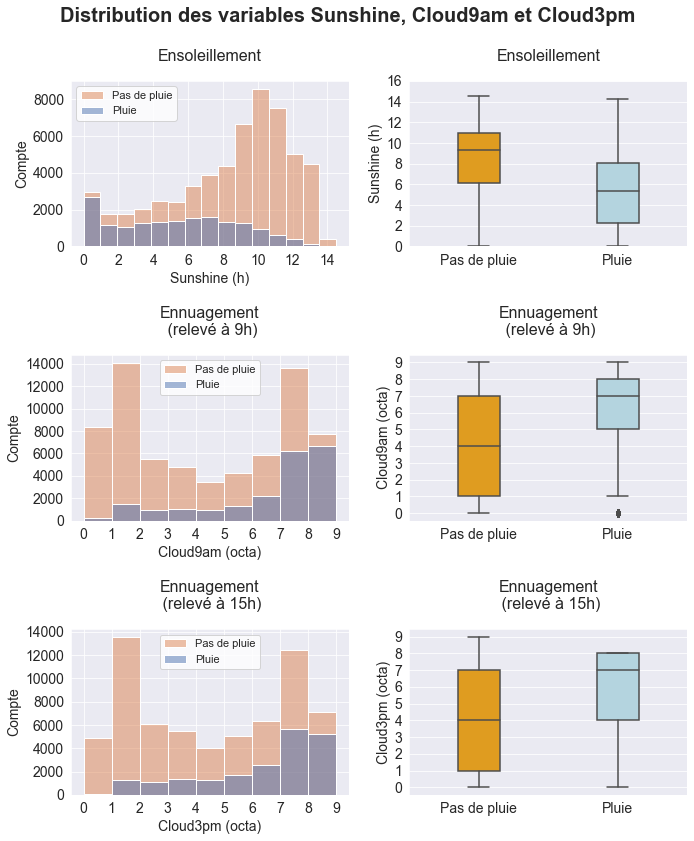

<i>L'obscurcissement du ciel par les nuages (variables Cloud9am et Cloud3pm) est mesurés en octa : 
un ciel parfaitement clair est indiqué par la valeur de 0 octa, alors qu'un ciel complètement couvert est estimé à 8 octas. 
La valeur spéciale de 9 octas est utilisée quand le ciel n'est pas observable en raison d'une obstruction à la visibilité 
(par exemple en cas de brouillard).</i>

In [6]:
#SUNSHINE, CLOUDS9AM, CLOUDS3PM
display(Markdown("<h2><u><center>Sunshine, Cloud9am, Cloud3pm</center></u></h2>"))

#Définition des variables
display(Markdown("<h4><u>Définition des variables :</u></h4>"))
display(Markdown("""<ul><li><i>Sunshine</i> est définie comme <i>'The number of hours of bright sunshine in the day.'</i>, 
soit le nombre d'heures d'ensoleillement sur la journée ;</li>
<li><i>Cloud9am</i> est définie comme <i>'Fraction of sky obscured by cloud at 9am. This is measured in "oktas", 
which are a unit of eigths. It records how many'</i>, soit le degré de couverture du ciel, mesuré en octas à 9h ;</li>
<li><i>Cloud3pm</i> est définie comme <i>'Fraction of sky obscured by cloud at 3pm. This is measured in "oktas", 
which are a unit of eigths. It records how many'</i>, soit le degré de couverture du ciel, mesuré en octas à 15h.</li>
</ul>"""))

#Description des variables
display(Markdown("<h4><u>Description des variables :</u></h4>"))
display(Markdown("<h5><i>Sunshine :</i></h5>"))
display(Markdown("""L'ensoleillement médian est de <b>{} heures</b> les jours de pluie et de <b>{} heures</b> 
les jours sans pluie. Toute météo confondue, la durée d'ensoleillement est <b>maximale</b> entre <b>décembre et février</b> 
(<b>{} heures</b>) et <b>minimale</b> entre <b>mai et juillet</b> (<b>{} heures</b>). D'une année à l'autre, mois par mois, 
il existe une variabilité de l'ensoleillement plus importante les jours de pluie que les jours sans pluie.
""".format(df[df["RainToday"] == "Yes"].Sunshine.median(),
           df[df["RainToday"] == "No"].Sunshine.median(),
           df[(df["Month"] == 12) | (df["Month"] == 1) | (df["Month"] == 2)].Sunshine.median(),
           df[(df["Month"] == 5) | (df["Month"] == 6) | (df["Month"] == 7)].Sunshine.median())))

display(Markdown("<h5><i>Clouds9am :</i></h5>"))       
display(Markdown("""L'ennuagement médian à 9h est de <b>{}</b> les jours de pluie et de <b>{}</b> les jours sans pluie.
La variabilité est nettement plus importante les jours sans pluie. L'ennuagement à 9h est très inconstant d'une localité 
à l'autre, toutefois il y a dans l'ensemble <b>peu d'outliers</b>.Douze localités n'ont <b>aucun relevé</b> d'ennuagement à 9h : Badgery Creek, Norah Head, 
Penrith, Tuggeranong, Mount Ginini, Nhil, Dartmoor, Gold Coast, Adelaide, Witchcliffe, Salmon Gums et Walpole. 
Enfin, l'ennuagement à 9h varie au fil des mois, de façon assez similaire qu'il pleuve ou non, et avec une 
variabilité par mois limitée et stable d'une année sur l'autre.
""".format(round(df[df["RainToday"] == "Yes"].Cloud9am.median(),1),
           round(df[df["RainToday"] == "No"].Cloud9am.median(),1))))

display(Markdown("<h5><i>Clouds3pm :</i></h5>"))       
display(Markdown("""L'ennuagement médian à 15h est de <b>{}</b> les jours de pluie et de <b>{}</b> les jours sans pluie.
Dans l'ensemble, <i>Cloud3pm</i> se comporte similairement à <i>Cloud9am</i>.
""".format(round(df[df["RainToday"] == "Yes"].Cloud3pm.median(),1),
           round(df[df["RainToday"] == "No"].Cloud3pm.median(),1))))

#Valeurs manquantes
display(Markdown("<h4><u>Valeurs manquantes :</u></h4>"))
display(Markdown("""<ul><li><i>Sunshine</i> : <b>{}</b> valeurs manquantes ({} %) ;</li> 
<li><i>Cloud9am</i> : <b>{}</b> valeurs manquantes ({} %) ;</li> 
<li><i>Cloud3pm</i> : <b>{}</b> valeurs manquantes ({} %).</li>
</ul>""".format(df_saved.Sunshine.isna().sum(),
                ((100*df_saved.Sunshine.isna().sum())/df_saved.shape[0]).round(1),
                df_saved.Cloud9am.isna().sum(),
                ((100*df_saved.Cloud9am.isna().sum())/df_saved.shape[0]).round(1),
                df_saved.Cloud3pm.isna().sum(),
                ((100*df_saved.Cloud3pm.isna().sum())/df_saved.shape[0]).round(1))))      

#Visualisation graphique
display(Markdown("<h4><u>Visualisation graphique :</u></h4>"))

plt.figure(figsize = (10,12))
plt.suptitle("Distribution des variables Sunshine, Cloud9am et Cloud3pm", fontsize = 20, fontweight = "bold")

plt.subplot(321)
plt.title("Ensoleillement", fontsize = 16, pad = 20)
sns.histplot(x = "Sunshine", data = df, hue = "RainToday", hue_order= ["Yes", "No"], bins = 15)
plt.xticks(size = 14)
plt.xlabel("Sunshine (h)", size = 14)
plt.yticks(size = 14)
plt.ylabel("Compte", size = 14)
plt.legend(fontsize = 11, labels=["Pas de pluie","Pluie"], facecolor = 'white')

plt.subplot(322)
plt.title("Ensoleillement", fontsize = 16, pad = 20)
sns.boxplot(y = "Sunshine", data = df, x = "RainToday", palette = ["orange", "lightblue"], width=0.3)
plt.xticks(ticks = [0,1], labels = ["Pas de pluie", "Pluie"], size = 14)
plt.xlabel(None)
plt.yticks(range(0,17,2),size = 14)
plt.ylabel("Sunshine (h)", size =14)
plt.ylim(0,16)

plt.subplot(323)
plt.title("Ennuagement\n (relevé à 9h)", fontsize = 16, pad = 20)
sns.histplot(x = "Cloud9am", data = df, hue = "RainToday", hue_order= ["Yes", "No"], bins = 9)
plt.xticks(range(0,10,1), size = 14)
plt.xticks()
plt.xlabel("Cloud9am (octa)", size = 14)
plt.yticks(size = 14)
plt.ylabel("Compte", size = 14)
plt.legend(fontsize = 11, labels=["Pas de pluie","Pluie"], facecolor = 'white')

plt.subplot(324)
plt.title("Ennuagement\n (relevé à 9h)", fontsize = 16, pad = 20)
sns.boxplot(y = "Cloud9am", data = df, x = "RainToday", palette = ["orange", "lightblue"], width=0.3)
plt.xticks(ticks = [0,1], labels = ["Pas de pluie", "Pluie"], size = 14)
plt.xlabel(None)
plt.yticks(range(0,10,1), size = 14)
plt.ylabel("Cloud9am (octa)", size =14)

plt.subplot(325)
plt.title("Ennuagement\n (relevé à 15h)", fontsize = 16, pad = 20)
sns.histplot(x = "Cloud3pm", data = df, hue = "RainToday", hue_order= ["Yes", "No"], bins = 9)
plt.xticks(range(0,10,1), size = 14)
plt.xlabel("Cloud3pm (octa)", size = 14)
plt.yticks(size = 14)
plt.ylabel("Compte", size = 14)
plt.legend(fontsize = 11, labels=["Pas de pluie","Pluie"], facecolor = 'white')

plt.subplot(326)
plt.title("Ennuagement\n (relevé à 15h)", fontsize = 16, pad = 20)
sns.boxplot(y = "Cloud3pm", data = df, x = "RainToday", palette = ["orange", "lightblue"], width=0.3)
plt.xticks(ticks = [0,1], labels = ["Pas de pluie", "Pluie"], size = 14)
plt.xlabel(None)
plt.yticks(range(0,10,1), size = 14)
plt.ylabel("Cloud3pm (octa)", size =14)

plt.tight_layout(pad=2)
plt.show();


display(Markdown("""<i>L'obscurcissement du ciel par les nuages (variables Cloud9am et Cloud3pm) est mesurés en octa : 
un ciel parfaitement clair est indiqué par la valeur de 0 octa, alors qu'un ciel complètement couvert est estimé à 8 octas. 
La valeur spéciale de 9 octas est utilisée quand le ciel n'est pas observable en raison d'une obstruction à la visibilité 
(par exemple en cas de brouillard).</i>"""))

In [7]:
#WINDGUSTDIR, WINDDIR9AM, WINDDIR3PM,
display(Markdown("<h2><u><center>WindGustDir, WindDir9am, WindDir3pm</center></u></h2>"))

#Définition des variables
display(Markdown("<h4><u>Définition des variables :</u></h4>"))
display(Markdown("""<ul><li><i>WindGustDir</i> est définie comme <i>'The direction of the strongest wind gust
in the 24 hours to midnight.'</i>, soit la direction de la plus forte rafale de vent sur 24h ;</li>
<li><i>WindDir9am</i> est définie comme <i>'Direction of the wind at 9am'</i>, soit la direction du vent à 9h ;</li>
<li><i>WindDir3pm</i> est définie comme <i>'Direction of the wind at 3pm'</i>, soit la direction du vent à 15h.</li>
</ul>"""))

#Description des variables
display(Markdown("<h4><u>Description des variables :</u></h4>"))
display(Markdown("<h5><i>WindGustDir :</i></h5>"))
display(Markdown("""Cette variable comporte <b>16 modalités</b> (Nord, Nord-Nord-Est, Nord-Est, Est-Nord-Est, Est...).
 Au sein d'un même état, les vents dominants ne sont jamais largement majoritaires : il existe une <b>importante variabilité</b>
 des directions qu'il pleuve ou non. Deux stations n'ont <b>aucun relevé</b> : <b>Albany</b> et <b>Newcastle</b>.
"""))

display(Markdown("<h5><i>WindDir9am et WindDir3pm :</i></h5>"))
display(Markdown("""Ces deux variables sont comportent les 16 mêmes modalités que WindGustDir. La matrice de confusion
entre les données mesurées à 9h et à 15h montre qu'à la fois, s'il est très fréquent que la direction du vent ne soit 
pas la même entre ces deux horaires, il reste assez rare que le vent change complètement d'orientation. Par exemple, 
pour un vent venant du Sud à 9h, les principales directions à 15h sont Sud, Sud-Sud-Est, Sud-Est, Sud-Sud-Ouest et Sud-Ouest.
"""))

#Valeurs manquantes
display(Markdown("<h4><u>Valeurs manquantes :</u></h4>"))
display(Markdown("""<ul><li><i>WindGustDir</i> : <b>{}</b> valeurs manquantes ({} %) ;</li> 
<li><i>WindDir9am</i> : <b>{}</b> valeurs manquantes ({} %) ;</li> 
<li><i>WindDir3pm</i> : <b>{}</b> valeurs manquantes ({} %).</li>
</ul>""".format(df_saved.WindGustDir.isna().sum(),
                ((100*df_saved.WindGustDir.isna().sum())/df_saved.shape[0]).round(1),
                df_saved.WindDir9am.isna().sum(),
                ((100*df_saved.WindDir9am.isna().sum())/df_saved.shape[0]).round(1),
                df_saved.WindDir3pm.isna().sum(),
                ((100*df_saved.WindDir3pm.isna().sum())/df_saved.shape[0]).round(1))))      


<h2><u><center>WindGustDir, WindDir9am, WindDir3pm</center></u></h2>

<h4><u>Définition des variables :</u></h4>

<ul><li><i>WindGustDir</i> est définie comme <i>'The direction of the strongest wind gust
in the 24 hours to midnight.'</i>, soit la direction de la plus forte rafale de vent sur 24h ;</li>
<li><i>WindDir9am</i> est définie comme <i>'Direction of the wind at 9am'</i>, soit la direction du vent à 9h ;</li>
<li><i>WindDir3pm</i> est définie comme <i>'Direction of the wind at 3pm'</i>, soit la direction du vent à 15h.</li>
</ul>

<h4><u>Description des variables :</u></h4>

<h5><i>WindGustDir :</i></h5>

Cette variable comporte <b>16 modalités</b> (Nord, Nord-Nord-Est, Nord-Est, Est-Nord-Est, Est...).
 Au sein d'un même état, les vents dominants ne sont jamais largement majoritaires : il existe une <b>importante variabilité</b>
 des directions qu'il pleuve ou non. Deux stations n'ont <b>aucun relevé</b> : <b>Albany</b> et <b>Newcastle</b>.


<h5><i>WindDir9am et WindDir3pm :</i></h5>

Ces deux variables sont comportent les 16 mêmes modalités que WindGustDir. La matrice de confusion
entre les données mesurées à 9h et à 15h montre qu'à la fois, s'il est très fréquent que la direction du vent ne soit 
pas la même entre ces deux horaires, il reste assez rare que le vent change complètement d'orientation. Par exemple, 
pour un vent venant du Sud à 9h, les principales directions à 15h sont Sud, Sud-Sud-Est, Sud-Est, Sud-Sud-Ouest et Sud-Ouest.


<h4><u>Valeurs manquantes :</u></h4>

<ul><li><i>WindGustDir</i> : <b>10326</b> valeurs manquantes (7.1 %) ;</li> 
<li><i>WindDir9am</i> : <b>10566</b> valeurs manquantes (7.3 %) ;</li> 
<li><i>WindDir3pm</i> : <b>4228</b> valeurs manquantes (2.9 %).</li>
</ul>

<h2><u><center>WindGustSpeed, WindSpeed9am, WindSpeed3pm</center></u></h2>

<h4><u>Définition des variables :</u></h4>

<ul><li><i>WindGustSpeed</i> est définie comme <i>'The speed (km/h) of the strongest wind gust in the 24 
hours to midnight'</i>, soit la vitesse de la plus forte rafale de vent sur 24h ;</li>
<li><i>WindSpeed9am</i> est définie comme <i>'Wind speed (km/hr) averaged over 10 minutes prior to 9am'</i>, 
soit la vitesse moyenne du vent entre 8:50 et 9:00 ;</li>
<li><i>WindSpeed3pm</i> est définie comme <i>'Wind speed (km/hr) averaged over 10 minutes prior to 3pm'</i>, 
soit la vitesse moyenne du vent entre 14:50 et 15:00.</li>
</ul>

<h4><u>Description des variables :</u></h4>

<h5><i>WindGustSpeed :</i></h5>

Les relevés vont de <b>6.0</b> à <b>135.0 km/h</b>, avec une vitesse moyenne de <b>40.0 km/h</b>.
 Il existe de nombreux outliers dans les valeurs hautes, mais leur impact reste limité (vitesse médiane : <b>39.0 km/h</b>).
 Similairement à la variable WindGustDir, il n'y a <b>aucun relevé</b> pour les stations <b>Albany</b> et <b>Newcastle</b>.
 De façon intéressante, les données suggèrent que le vent souffle plus fort les jours de pluie : <b>44.0 km/h</b> en moyenne 
 contre <b>38.9 km/h</b> les jours sans pluie. Enfin, la variabilité semble plus importante les jours de pluie.


<h5><i>WindSpeed9am :</i></h5>

La vitesse moyenne du vent à 9h est de <b>15.7 ± 9.5 km/h</b> les jours de pluie, 
et de <b>13.5 ± 8.7 km/h</b> les jours sans pluie.
Les données à 9h sont grossièrement corrélées à celles mesurées à 15h (<i>Spearman</i> : <b>0.46</b>), ainsi qu'avec le relevé de vitesse de la plus
forte rafale (<i>Spearman</i> : <b>0.59</b>), avec toutefois une importante variabilité.


<h5><i>WindSpeed3pm :</i></h5>

La vitesse moyenne du vent à 15h est de <b>20.0 ± 9.4 km/h</b> les jours de pluie, et de <b>18.3 ± 8.6 km/h</b>
les jours sans pluie. Les données à 15h sont également corrélées avec le relevé de vitesse de la plus forte rafale 
(<i>Spearman</i> : <b>0.59</b>), avec toutefois une importante variabilité.


<h4><u>Valeurs manquantes :</u></h4>

<ul><li><i>WindGustSpeed</i> : <b>10263</b> valeurs manquantes (7.1 %) ;</li>
<li><i>WindSpeed9am</i> : <b>1767</b> valeurs manquantes (1.2 %) ;</li> 
<li><i>WindSpeed3pm</i> : <b>3062</b> valeurs manquantes (2.1 %).</li>
</ul>

<h4><u>Visualisation graphique :</u></h4>

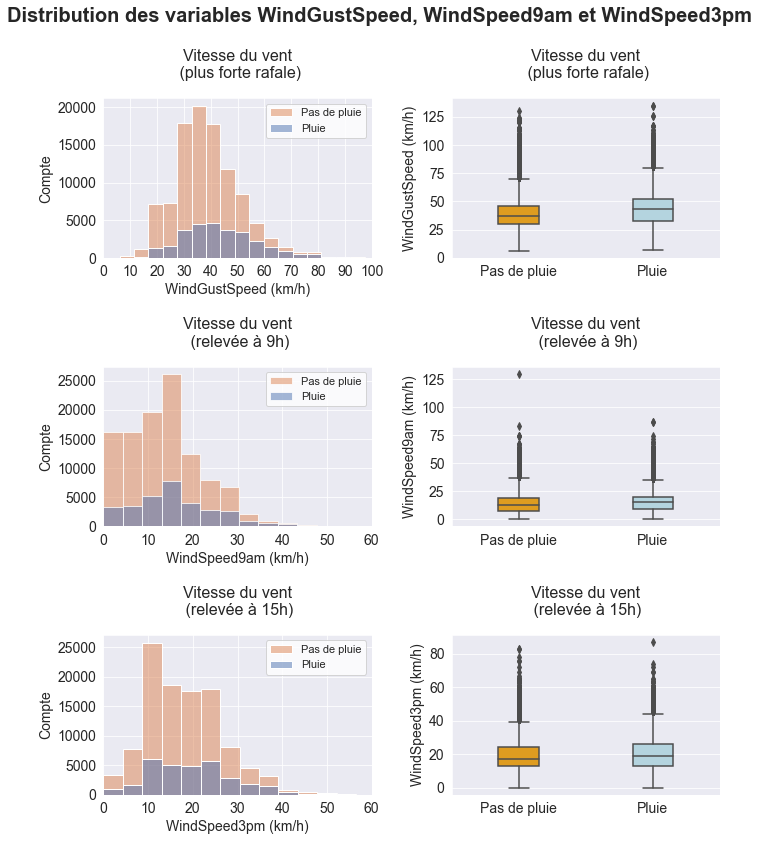

<i>Pour une meilleure visualisation, les données de WindGustSpeed sont représentées jusqu'à 100 km/h,
les outliers vont jusque 135.0 km/h. Les données pour WindSpeed 9am et 3am sont représentées jusqu'à 60 km/h, 
les outliers vont jusque 130.0 km/h (9am) et jusque 87.0 km/h (3pm).</i>

In [8]:
#WINDGUSTSPEED, WINDSPEED9AM, WINDSPEED3PM,
display(Markdown("<h2><u><center>WindGustSpeed, WindSpeed9am, WindSpeed3pm</center></u></h2>"))

#Définition des variables
display(Markdown("<h4><u>Définition des variables :</u></h4>"))
display(Markdown("""<ul><li><i>WindGustSpeed</i> est définie comme <i>'The speed (km/h) of the strongest wind gust in the 24 
hours to midnight'</i>, soit la vitesse de la plus forte rafale de vent sur 24h ;</li>
<li><i>WindSpeed9am</i> est définie comme <i>'Wind speed (km/hr) averaged over 10 minutes prior to 9am'</i>, 
soit la vitesse moyenne du vent entre 8:50 et 9:00 ;</li>
<li><i>WindSpeed3pm</i> est définie comme <i>'Wind speed (km/hr) averaged over 10 minutes prior to 3pm'</i>, 
soit la vitesse moyenne du vent entre 14:50 et 15:00.</li>
</ul>"""))

#Description des variables
display(Markdown("<h4><u>Description des variables :</u></h4>"))
display(Markdown("<h5><i>WindGustSpeed :</i></h5>"))
display(Markdown("""Les relevés vont de <b>{}</b> à <b>{} km/h</b>, avec une vitesse moyenne de <b>{} km/h</b>.
 Il existe de nombreux outliers dans les valeurs hautes, mais leur impact reste limité (vitesse médiane : <b>{} km/h</b>).
 Similairement à la variable WindGustDir, il n'y a <b>aucun relevé</b> pour les stations <b>Albany</b> et <b>Newcastle</b>.
 De façon intéressante, les données suggèrent que le vent souffle plus fort les jours de pluie : <b>{} km/h</b> en moyenne 
 contre <b>{} km/h</b> les jours sans pluie. Enfin, la variabilité semble plus importante les jours de pluie.
""".format(df.WindGustSpeed.describe()["min"],
           df.WindGustSpeed.describe()["max"],
           df.WindGustSpeed.describe()["mean"].round(1),
           df.WindGustSpeed.describe()["50%"],
           df[df["RainToday"] == "Yes"].WindGustSpeed.describe()["mean"].round(1),
           df[df["RainToday"] == "No"].WindGustSpeed.describe()["mean"].round(1))))

display(Markdown("<h5><i>WindSpeed9am :</i></h5>"))
display(Markdown("""La vitesse moyenne du vent à 9h est de <b>{} ± {} km/h</b> les jours de pluie, 
et de <b>{} ± {} km/h</b> les jours sans pluie.
Les données à 9h sont grossièrement corrélées à celles mesurées à 15h (<i>Spearman</i> : <b>{}</b>), ainsi qu'avec le relevé de vitesse de la plus
forte rafale (<i>Spearman</i> : <b>{}</b>), avec toutefois une importante variabilité.
""".format(df[df["RainToday"] == "Yes"].WindSpeed9am.describe()["mean"].round(1),
           df[df["RainToday"] == "Yes"].WindSpeed9am.describe()["std"].round(1),
           df[df["RainToday"] == "No"].WindSpeed9am.describe()["mean"].round(1),
           df[df["RainToday"] == "No"].WindSpeed9am.describe()["std"].round(1),
           round(stats.spearmanr(df.dropna()["WindSpeed9am"], df.dropna()["WindSpeed3pm"])[0],2),
           round(stats.spearmanr(df.dropna()["WindSpeed9am"], df.dropna()["WindGustSpeed"])[0],2))))

display(Markdown("<h5><i>WindSpeed3pm :</i></h5>"))
display(Markdown("""La vitesse moyenne du vent à 15h est de <b>{} ± {} km/h</b> les jours de pluie, et de <b>{} ± {} km/h</b>
les jours sans pluie. Les données à 15h sont également corrélées avec le relevé de vitesse de la plus forte rafale 
(<i>Spearman</i> : <b>{}</b>), avec toutefois une importante variabilité.
""".format(df[df["RainToday"] == "Yes"].WindSpeed3pm.describe()["mean"].round(1),
           df[df["RainToday"] == "Yes"].WindSpeed3pm.describe()["std"].round(1),
           df[df["RainToday"] == "No"].WindSpeed3pm.describe()["mean"].round(1),
           df[df["RainToday"] == "No"].WindSpeed3pm.describe()["std"].round(1),
           round(stats.spearmanr(df.dropna()["WindSpeed9am"], df.dropna()["WindGustSpeed"])[0],2))))

display(Markdown("<h4><u>Valeurs manquantes :</u></h4>"))
display(Markdown("""<ul><li><i>WindGustSpeed</i> : <b>{}</b> valeurs manquantes ({} %) ;</li>
<li><i>WindSpeed9am</i> : <b>{}</b> valeurs manquantes ({} %) ;</li> 
<li><i>WindSpeed3pm</i> : <b>{}</b> valeurs manquantes ({} %).</li>
</ul>""".format(df_saved.WindGustSpeed.isna().sum(),
                ((100*df_saved.WindGustSpeed.isna().sum())/df_saved.shape[0]).round(1),
                df_saved.WindSpeed9am.isna().sum(),
                ((100*df_saved.WindSpeed9am.isna().sum())/df_saved.shape[0]).round(1),
                df_saved.WindSpeed3pm.isna().sum(),
                ((100*df_saved.WindSpeed3pm.isna().sum())/df_saved.shape[0]).round(1))))      

#Visualisation graphique
display(Markdown("<h4><u>Visualisation graphique :</u></h4>"))

plt.figure(figsize = (10,12))
plt.suptitle("Distribution des variables WindGustSpeed, WindSpeed9am et WindSpeed3pm", fontsize = 20, fontweight = "bold")

plt.subplot(321)
plt.title("Vitesse du vent\n (plus forte rafale)", fontsize = 16, pad = 20)
sns.histplot(x = "WindGustSpeed", data = df, hue = "RainToday", hue_order= ["Yes", "No"], bins = 24)
plt.xticks(range(0,101,10), size = 14)
plt.xlim(0,100)
plt.xlabel("WindGustSpeed (km/h)", size = 14)
plt.yticks(size = 14)
plt.ylabel("Compte", size = 14)
plt.legend(fontsize = 11, labels=["Pas de pluie","Pluie"], facecolor = 'white')

plt.subplot(322)
plt.title("Vitesse du vent\n (plus forte rafale)", fontsize = 16, pad = 20)
sns.boxplot(y = "WindGustSpeed", data = df, x = "RainToday", palette = ["orange", "lightblue"], width=0.3)
plt.xticks(ticks = [0,1], labels = ["Pas de pluie", "Pluie"], size = 14)
plt.xlabel(None)
plt.yticks(size = 14)
plt.ylabel("WindGustSpeed (km/h)", size =14)

plt.subplot(323)
plt.title("Vitesse du vent\n (relevée à 9h)", fontsize = 16, pad = 20)
sns.histplot(x = "WindSpeed9am", data = df, hue = "RainToday", hue_order= ["Yes", "No"], bins = 30)
plt.xlim(0,60)
plt.xticks(size = 14)
plt.xticks()
plt.xlabel("WindSpeed9am (km/h)", size = 14)
plt.yticks(size = 14)
plt.ylabel("Compte", size = 14)
plt.legend(fontsize = 11, labels=["Pas de pluie","Pluie"], facecolor = 'white')

plt.subplot(324)
plt.title("Vitesse du vent\n (relevée à 9h)", fontsize = 16, pad = 20)
sns.boxplot(y = "WindSpeed9am", data = df, x = "RainToday", palette = ["orange", "lightblue"], width=0.3)
plt.xticks(ticks = [0,1], labels = ["Pas de pluie", "Pluie"], size = 14)
plt.xlabel(None)
plt.yticks(size = 14)
plt.ylabel("WindSpeed9am (km/h)", size = 14)

plt.subplot(325)
plt.title("Vitesse du vent\n (relevée à 15h)", fontsize = 16, pad = 20)
sns.histplot(x = "WindSpeed3pm", data = df, hue = "RainToday", hue_order= ["Yes", "No"], bins = 20)
plt.xticks(size = 14)
plt.xlim(0,60)
plt.xlabel("WindSpeed3pm (km/h)", size = 14)
plt.yticks(size = 14)
plt.ylabel("Compte", size = 14)
plt.legend(fontsize = 11, labels=["Pas de pluie","Pluie"], facecolor = 'white')

plt.subplot(326)
plt.title("Vitesse du vent\n (relevée à 15h)", fontsize = 16, pad = 20)
sns.boxplot(y = "WindSpeed3pm", data = df, x = "RainToday", palette = ["orange", "lightblue"], width=0.3)
plt.xticks(ticks = [0,1], labels = ["Pas de pluie", "Pluie"], size = 14)
plt.xlabel(None)
plt.yticks(size = 14)
plt.ylabel("WindSpeed3pm (km/h)", size = 14)
plt.tight_layout(pad=2)
plt.show();

display(Markdown("""<i>Pour une meilleure visualisation, les données de WindGustSpeed sont représentées jusqu'à 100 km/h,
les outliers vont jusque {} km/h. Les données pour WindSpeed 9am et 3am sont représentées jusqu'à 60 km/h, 
les outliers vont jusque {} km/h (9am) et jusque {} km/h (3pm).</i>""".format(
df.WindGustSpeed.describe()["max"],
df.WindSpeed9am.describe()["max"],
df.WindSpeed3pm.describe()["max"])))

<h2><u><center>Pressure9am, Pressure3pm</center></u></h2>

<h4><u>Définition des variables :</u></h4>

<ul><li><i>Pressure9am</i> est définie comme <i>'Atmospheric pressure (hpa) reduced to mean sea level at 9am'</i>,
soit la pression atmosphérique en fonction du niveau de la mer, à 9h ;</li>
<li><i>Pressure3pm</i> est définie comme <i>'Atmospheric pressure (hpa) reduced to mean sea level at 3pm'</i>, 
soit la pression atmosphérique en fonction du niveau de la mer, à 15h.</li>
</ul>

<h4><u>Description des variables :</u></h4>

<h5><i>Pressure9am :</i></h5>

La pression atmosphérique moyenne à 9h est <b>plus élevée</b> les jours de pluie (<b>1015.1 ± 7.6 hpa</b>) 
que les jours sans pluie (<b>1018.4 ± 6.8 hpa</b>). Il y'a de nombreux outliers, pour les valeurs hautes comme pour les valeurs basses.
Cette variable est remarquablement constante d'une localité à l'autre, avec une amplitude qui varie très peu.
Exception notable pour quatre localités : Darwin (NT), Katherine (NT), Cairns (QLD) et Townsville (QLD) 
qui ont des <b>pressions plus faibles</b> (toutes situées dans la partie <b>Nord de l'Australie</b>).
<b>Quatre localités</b> n'ont <b>aucun relevé</b> de pression atmosphérique à 9h : Newcastle, Penrith, Mount Ginini et Salmon Gums.


<h5><i>Pressure3pm :</i></h5>

La pression atmosphérique moyenne à 15h est <b>plus élevée</b> les jours de pluie (<b>1013.9 ± 7.6 hpa</b>) 
que les jours sans pluie (<b>1015.7 ± 6.8 hpa</b>).
La distribution de la pression atmosphérique est <b>très similaire à 15h et à 9h</b>. 
Toutefois à 15h, la différence de pression entre les jours avec et sans pluie est moins marquée qu'à 9h.
Il y'a également, à 15h, de nombreux outliers, pour les valeurs hautes comme pour les valeurs basses. La pression atmosphérique
a 15h est très fortement correlée à la pression à 9h (<i>Spearman</i> : <b>0.96</b>).


<h4><u>Valeurs manquantes :</u></h4>

<ul><li><i>Pressure9am</i> : <b>15065</b> valeurs manquantes (10.4 %) ;</li>
<li><i>Pressure3pm</i> : <b>15028</b> valeurs manquantes (10.3 %).</li>
</ul>

<h4><u>Visualisation graphique :</u></h4>

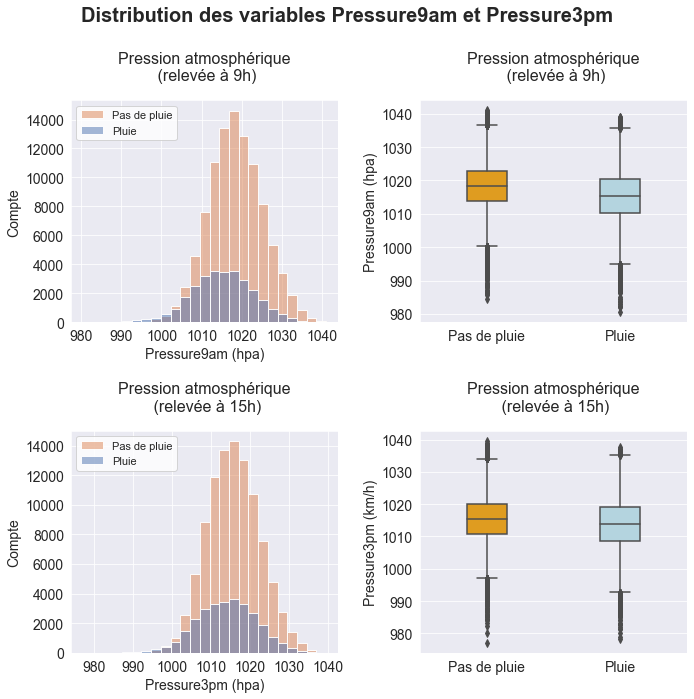

In [9]:
#PRESSURE9AM, PRESSURE3PM.
display(Markdown("<h2><u><center>Pressure9am, Pressure3pm</center></u></h2>"))

#Définition des variables
display(Markdown("<h4><u>Définition des variables :</u></h4>"))
display(Markdown("""<ul><li><i>Pressure9am</i> est définie comme <i>'Atmospheric pressure (hpa) reduced to mean sea level at 9am'</i>,
soit la pression atmosphérique en fonction du niveau de la mer, à 9h ;</li>
<li><i>Pressure3pm</i> est définie comme <i>'Atmospheric pressure (hpa) reduced to mean sea level at 3pm'</i>, 
soit la pression atmosphérique en fonction du niveau de la mer, à 15h.</li>
</ul>"""))

#Description des variables
display(Markdown("<h4><u>Description des variables :</u></h4>"))
display(Markdown("<h5><i>Pressure9am :</i></h5>"))
display(Markdown("""La pression atmosphérique moyenne à 9h est <b>plus élevée</b> les jours de pluie (<b>{} ± {} hpa</b>) 
que les jours sans pluie (<b>{} ± {} hpa</b>). Il y'a de nombreux outliers, pour les valeurs hautes comme pour les valeurs basses.
Cette variable est remarquablement constante d'une localité à l'autre, avec une amplitude qui varie très peu.
Exception notable pour quatre localités : Darwin (NT), Katherine (NT), Cairns (QLD) et Townsville (QLD) 
qui ont des <b>pressions plus faibles</b> (toutes situées dans la partie <b>Nord de l'Australie</b>).
<b>Quatre localités</b> n'ont <b>aucun relevé</b> de pression atmosphérique à 9h : Newcastle, Penrith, Mount Ginini et Salmon Gums.
""".format(df[df["RainToday"] == "Yes"].Pressure9am.describe()["mean"].round(1),
           df[df["RainToday"] == "Yes"].Pressure9am.describe()["std"].round(1),
           df[df["RainToday"] == "No"].Pressure9am.describe()["mean"].round(1),
           df[df["RainToday"] == "No"].Pressure9am.describe()["std"].round(1))))

display(Markdown("<h5><i>Pressure3pm :</i></h5>"))
display(Markdown("""La pression atmosphérique moyenne à 15h est <b>plus élevée</b> les jours de pluie (<b>{} ± {} hpa</b>) 
que les jours sans pluie (<b>{} ± {} hpa</b>).
La distribution de la pression atmosphérique est <b>très similaire à 15h et à 9h</b>. 
Toutefois à 15h, la différence de pression entre les jours avec et sans pluie est moins marquée qu'à 9h.
Il y'a également, à 15h, de nombreux outliers, pour les valeurs hautes comme pour les valeurs basses. La pression atmosphérique
a 15h est très fortement correlée à la pression à 9h (<i>Spearman</i> : <b>{}</b>).
""".format(df[df["RainToday"] == "Yes"].Pressure3pm.describe()["mean"].round(1),
           df[df["RainToday"] == "Yes"].Pressure3pm.describe()["std"].round(1),
           df[df["RainToday"] == "No"].Pressure3pm.describe()["mean"].round(1),
           df[df["RainToday"] == "No"].Pressure3pm.describe()["std"].round(1), 
           round(stats.spearmanr(df.dropna()["Pressure9am"], df.dropna()["Pressure3pm"])[0], 2))))

display(Markdown("<h4><u>Valeurs manquantes :</u></h4>"))
display(Markdown("""<ul><li><i>Pressure9am</i> : <b>{}</b> valeurs manquantes ({} %) ;</li>
<li><i>Pressure3pm</i> : <b>{}</b> valeurs manquantes ({} %).</li>
</ul>""".format(df_saved.Pressure9am.isna().sum(),
                ((100*df_saved.Pressure9am.isna().sum())/df_saved.shape[0]).round(1),
                df_saved.Pressure3pm.isna().sum(),
                ((100*df_saved.Pressure3pm.isna().sum())/df_saved.shape[0]).round(1))))      

#Visualisation graphique
display(Markdown("<h4><u>Visualisation graphique :</u></h4>"))

#histogrammes
plt.figure(figsize = (10,10))
plt.suptitle("Distribution des variables Pressure9am et Pressure3pm", fontsize = 20, fontweight = "bold")

plt.subplot(221)
plt.title("Pression atmosphérique\n (relevée à 9h)", fontsize = 16, pad = 20)
sns.histplot(x = "Pressure9am", data = df, hue = "RainToday", hue_order= ["Yes", "No"], bins = 25)
plt.xticks(size = 14)
plt.xlabel("Pressure9am (hpa)", size = 14)
plt.yticks(size = 14)
plt.ylabel("Compte", size = 14)
plt.legend(fontsize = 11, labels=["Pas de pluie","Pluie"], facecolor = 'white')

plt.subplot(222)
plt.title("Pression atmosphérique\n (relevée à 9h)", fontsize = 16, pad = 20)
sns.boxplot(y = "Pressure9am", data = df, x = "RainToday", palette = ["orange", "lightblue"], width=0.3)
plt.xticks(ticks = [0,1], labels = ["Pas de pluie", "Pluie"], size = 14)
plt.xlabel(None)
plt.yticks(size = 14)
plt.ylabel("Pressure9am (hpa)", size =14)

plt.subplot(223)
plt.title("Pression atmosphérique\n (relevée à 15h)", fontsize = 16, pad = 20)
sns.histplot(x = "Pressure3pm", data = df, hue = "RainToday", hue_order= ["Yes", "No"], bins = 25)
plt.xticks(size = 14)
plt.xticks()
plt.xlabel("Pressure3pm (hpa)", size = 14)
plt.yticks(size = 14)
plt.ylabel("Compte", size = 14)
plt.legend(fontsize = 11, labels=["Pas de pluie","Pluie"], facecolor = 'white')

plt.subplot(224)
plt.title("Pression atmosphérique\n (relevée à 15h)", fontsize = 16, pad = 20)
sns.boxplot(y = "Pressure3pm", data = df, x = "RainToday", palette = ["orange", "lightblue"], width=0.3)
plt.xticks(ticks = [0,1], labels = ["Pas de pluie", "Pluie"], size = 14)
plt.xlabel(None)
plt.yticks(size = 14)
plt.ylabel("Pressure3pm (km/h)", size =14)

plt.tight_layout(pad=2)
plt.show();


In [10]:
#RAINTODAY, RAINTOMORROW.
display(Markdown("<h2><u><center>RainToday, RainTomorrow</center></u></h2>"))

#Définition des variables
display(Markdown("<h4><u>Définition des variables :</u></h4>"))
display(Markdown("""<ul><li><i>RainToday</i> est définie comme <i>'Boolean: 1 if precipitation (mm) in the 24 hours to 9am 
exceeds 1mm, otherwise 0'</i>, soit 1 pour un jour de pluie (défini pour une hauteur de précipitation > 1 mm, 0 sinon ;</li>
<li><i>RainTomorrow</i> est définie comme <i>'The amount of next day rain in mm. Used to create response variable RainTomorrow. 
A kind of measure of the "risk".'</i>, soit hauteur de précipitations le jour suivant.</li>
</ul>
"""))

display(Markdown("""Attention, les définitions fournies avec le dataset sont inexactes. 
Il s'agit pour les deux de variables catégorielles binaires, codées '<i>Yes</i>' ou '<i>No</i>' suivant s'il pleuvait 
ou non les jours considérés.
"""))

#Description des variables
display(Markdown("<h4><u>Description des variables :</u></h4>"))
display(Markdown("<h5><i>RainToday :</i></h5>"))

display(Markdown("""Sur l'ensemble des données, il y a <b>{} jours de pluie</b> (<b>{} %</b>) et <b>{} jours sans pluie</b> 
(<b>{} %</b>).
""".format(df[df["RainToday"] == "Yes"]["RainToday"].count(),
           (100*(df[df["RainToday"] == "Yes"]["RainToday"].count())/df.shape[0]).round(1),
           df[df["RainToday"] == "No"]["RainToday"].count(),
           (100*(df[df["RainToday"] == "No"]["RainToday"].count())/df.shape[0]).round(1))))

display(Markdown("<h5><i>RainTomorrow :</i></h5>"))   
display(Markdown("Il s'agit de la variable à prédire"))

#Valeurs manquantes
display(Markdown("<h4><u>Valeurs manquantes :</u></h4>"))
display(Markdown("""<ul><li><i>RainToday</i> : <b>{}</b> valeurs manquantes ({} %) ;</li> 
<li><i>RainTomorrow</i> : <b>{}</b> valeurs manquantes ({} %)</li>
</ul>""".format(df_saved.RainToday.isna().sum(),
                ((100*df_saved.RainToday.isna().sum())/df_saved.shape[0]).round(1),
                df_saved.RainTomorrow.isna().sum(),
                ((100*df_saved.RainTomorrow.isna().sum())/df_saved.shape[0]).round(1))))      


<h2><u><center>RainToday, RainTomorrow</center></u></h2>

<h4><u>Définition des variables :</u></h4>

<ul><li><i>RainToday</i> est définie comme <i>'Boolean: 1 if precipitation (mm) in the 24 hours to 9am 
exceeds 1mm, otherwise 0'</i>, soit 1 pour un jour de pluie (défini pour une hauteur de précipitation > 1 mm, 0 sinon ;</li>
<li><i>RainTomorrow</i> est définie comme <i>'The amount of next day rain in mm. Used to create response variable RainTomorrow. 
A kind of measure of the "risk".'</i>, soit hauteur de précipitations le jour suivant.</li>
</ul>


Attention, les définitions fournies avec le dataset sont inexactes. 
Il s'agit pour les deux de variables catégorielles binaires, codées '<i>Yes</i>' ou '<i>No</i>' suivant s'il pleuvait 
ou non les jours considérés.


<h4><u>Description des variables :</u></h4>

<h5><i>RainToday :</i></h5>

Sur l'ensemble des données, il y a <b>31880 jours de pluie</b> (<b>21.9 %</b>) et <b>110319 jours sans pluie</b> 
(<b>75.8 %</b>).


<h5><i>RainTomorrow :</i></h5>

Il s'agit de la variable à prédire

<h4><u>Valeurs manquantes :</u></h4>

<ul><li><i>RainToday</i> : <b>3261</b> valeurs manquantes (2.2 %) ;</li> 
<li><i>RainTomorrow</i> : <b>3267</b> valeurs manquantes (2.2 %)</li>
</ul>